# 1.1 Getting Correspondences

In [3]:
from tkinter import *
from tkinter.filedialog import askopenfilename
from PIL import ImageTk, Image
import numpy as np
import cv2

from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
p = []

In [3]:
event2canvas = lambda e, c: (c.canvasx(e.x), c.canvasy(e.y))
root = Tk()

#Setting up a tkinter canvas with scrollbars
frame = Frame(root, bd=2, relief=SUNKEN)
frame.grid_rowconfigure(0, weight=1)
frame.grid_columnconfigure(0, weight=1)
xscroll = Scrollbar(frame, orient=HORIZONTAL)
xscroll.grid(row=1, column=0, sticky=E+W)
yscroll = Scrollbar(frame)
yscroll.grid(row=0, column=1, sticky=N+S)
canvas = Canvas(frame, bd=0, xscrollcommand=xscroll.set, yscrollcommand=yscroll.set)
canvas.grid(row=0, column=0, sticky=N+S+E+W)
xscroll.config(command=canvas.xview)
yscroll.config(command=canvas.yview)
frame.pack(fill=BOTH,expand=1)

#Adding the image
img = ImageTk.PhotoImage(Image.open('image2.jpg'))     #change for desired img [ image1 / image2 ]
# img = ImageTk.PhotoImage(Image.open('image2.jpg'))     #change for desired img [ image1 / image2 ]
canvas.create_image(0,0,image=img,anchor="nw")
canvas.config(scrollregion=canvas.bbox(ALL))

#function to be called when mouse is clicked
def savecoords(event):
    #outputting x and y coords to console
    cx, cy = event2canvas(event, canvas)
    p.append((event.x,event.y))      #change the array to be filled [ p / p_dash ]
#     p_dash.append((event.x,event.y))      #change the array to be filled [ p / p_dash ]
    print (event.x,event.y)
    
#mouseclick event
canvas.bind("<ButtonPress-1>",savecoords)


root.mainloop()

789 333
985 351
908 541
782 539


In [4]:
p_dash = []

In [5]:
event2canvas = lambda e, c: (c.canvasx(e.x), c.canvasy(e.y))
root = Tk()

#Setting up a tkinter canvas with scrollbars
frame = Frame(root, bd=2, relief=SUNKEN)
frame.grid_rowconfigure(0, weight=1)
frame.grid_columnconfigure(0, weight=1)
xscroll = Scrollbar(frame, orient=HORIZONTAL)
xscroll.grid(row=1, column=0, sticky=E+W)
yscroll = Scrollbar(frame)
yscroll.grid(row=0, column=1, sticky=N+S)
canvas = Canvas(frame, bd=0, xscrollcommand=xscroll.set, yscrollcommand=yscroll.set)
canvas.grid(row=0, column=0, sticky=N+S+E+W)
xscroll.config(command=canvas.xview)
yscroll.config(command=canvas.yview)
frame.pack(fill=BOTH,expand=1)

#Adding the image
# img = ImageTk.PhotoImage(Image.open('image1.jpg'))     #change for desired img [ image1 / image2 ]
img = ImageTk.PhotoImage(Image.open('image1.jpg'))     #change for desired img [ image1 / image2 ]
canvas.create_image(0,0,image=img,anchor="nw")
canvas.config(scrollregion=canvas.bbox(ALL))

#function to be called when mouse is clicked
def savecoords(event):
    #outputting x and y coords to console
    cx, cy = event2canvas(event, canvas)
#     p.append((event.x,event.y))      #change the array to be filled [ p / p_dash ]
    p_dash.append((event.x,event.y))      #change the array to be filled [ p / p_dash ]
    print (event.x,event.y)
    
#mouseclick event
canvas.bind("<ButtonPress-1>",savecoords)


root.mainloop()

346 302
530 333
446 510
326 506


In [6]:
p=np.array(p)
p_dash=np.array(p_dash)
print(" p is : \n" , p , " | \n\n p_dash is \n", p_dash)

 p is : 
 [[789 333]
 [985 351]
 [908 541]
 [782 539]]  | 

 p_dash is 
 [[346 302]
 [530 333]
 [446 510]
 [326 506]]


# 1.2 Compute the Homography Parameters

In [2]:
def get_Homography_matrix_using_DLT(p,p_dash):
    A=[]
    for i in range(len(p)):
        x=p[i][0]  
        y=p[i][1] 
        x_dash=p_dash[i][0] 
        y_dash=p_dash[i][1] 
        # Fill Ai matrix ....
        A.append( [-x, -y, -1, 0, 0, 0, x_dash*x, x_dash*y, x_dash] )
        A.append( [0, 0, 0, -x, -y, -1, y_dash*x, y_dash*y, y_dash] )
        
    A = np.asarray(A)
    U, S, Vh = np.linalg.svd(A)
    #Divide last singular vector(min one) by last value (to get h9 = 1 ; hi:h8/h9)
    V= Vh[-1,:] / Vh[-1,-1]
    H = V.reshape(3, 3)           
    
    return H

In [3]:
H_matrix= get_Homography_matrix_using_DLT(p,p_dash)
H_matrix

NameError: name 'p' is not defined

Using CV2 Lib For Verification

In [9]:
H_,status= cv2.findHomography(p,p_dash)
print(H_)
print(status)

[[ 1.45695978e+00 -4.43317575e-02 -6.73757710e+02]
 [ 2.10781279e-01  1.38179267e+00 -2.24049269e+02]
 [ 3.70036550e-04  1.21537617e-04  1.00000000e+00]]
[[1]
 [1]
 [1]
 [1]]


In [4]:
H_new_2=np.array([[ 1.45695978e+00 ,-4.43317575e-02 ,-6.73757710e+02],
 [ 2.10781279e-01,  1.38179267e+00 ,-2.24049269e+02],
 [ 3.70036550e-04 , 1.21537617e-04 , 1.00000000e+00]])

# 1.3 Warping Between Image Planes

In [5]:
figsize = (8,18)

def _plot(img):
    plt.figure(figsize=figsize)
    plt.imshow(img)

def read_img(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

im_src = read_img('image2.jpg')
im_dst = read_img('image1.jpg')



In [6]:
def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype='int')
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype='int')
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
        
    return img

In [7]:
def warpPerspective(img, M, dsize):
    mtr =to_mtx(img)
    R,C = dsize
    dst = np.zeros((R,C,mtr.shape[2]))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            res = np.dot(M, [i,j,1])
            i2,j2,_ = (res / res[2] + 0.5).astype(int)
            if i2 >= 0 and i2 < R:
                if j2 >= 0 and j2 < C:
                    dst[i2,j2] = mtr[i,j]
    
    return to_img(dst) 

In [91]:
import math

In [132]:
# Linear Interpolation 



def Linear_Interpolated_Inverse_Warp(dst,inverse,im_src,src_size):
    mtr =to_mtx(dst)
    mtr_src =to_mtx(im_src)
    R,C = src_size
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            reversed_point=  np.dot(inverse, [i,j,1])
            i2,j2,_ = (reversed_point / reversed_point[2] +0.5 )
            
            ix = math.floor(i2)
            jx = math.floor(j2)
            
            
            if ix >= 0 and ix < R-1:
                if jx >= 0 and jx < C-1:
                    dst[i,j] = mtr[ix,jx]                
                    a = i2 - ix
                    b = j2 - jx
                    w1 = (1-a)*(1-b) * mtr_src[ix][jx]
                    w2 = a*(1-b)     * mtr_src[ix+1][jx]
                    w3 = a*b         * mtr_src[ix+1][jx+1]
                    w4 = (1-a)*b     * mtr_src[ix][jx+1]                
                    mtr[i,j]=w1 + w2 + w3 + w4
        
    return to_img(mtr)     
        


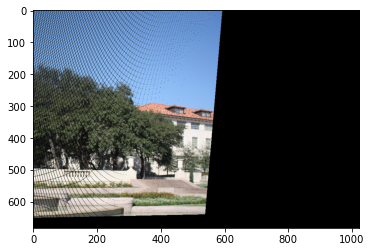

In [107]:
im_out_manual = warpPerspective(im_src, H_new_2, (im_dst.shape[1],im_dst.shape[0]))
plt.imshow(im_out_manual)


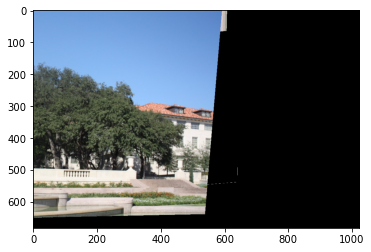

In [133]:
inverse = np.linalg.inv(H_new_2)
im_out_interpolated = Linear_Interpolated_Inverse_Warp(im_out_manual,inverse,im_src,(im_src.shape[1],im_src.shape[0]))
plt.imshow(im_out_interpolated)

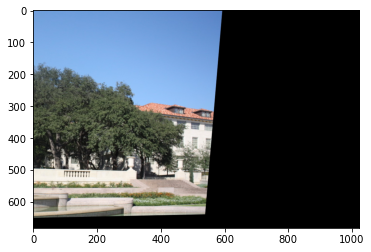

In [134]:
im_out = cv2.warpPerspective(im_src, H_new_2, (im_dst.shape[1],im_dst.shape[0]))
plt.imshow(im_out)

In [135]:
im_dst_new = np.array(im_dst, dtype=np.int32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


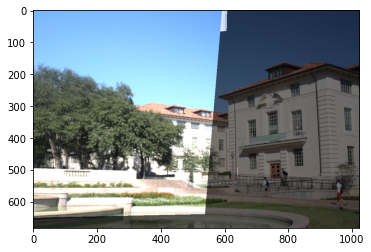

In [138]:
dst = cv2.addWeighted(im_dst_new, 0.5, im_out_interpolated, 0.9, 0)
plt.imshow(dst)


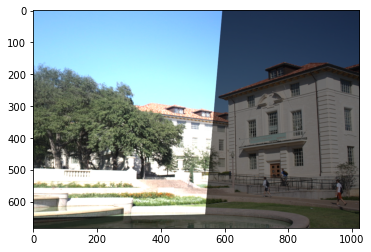

In [18]:
dst_1 = cv2.addWeighted(im_dst, 0.5, im_out, 1, 0)
plt.imshow(dst_1)